<a href="https://colab.research.google.com/github/Toramaru42/djl-smartgrid-project/blob/main/notebooks/02_q_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!apt -y install fonts-ipafont-gothic

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'  # IPAフォントに切り替え

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
X = pd.read_csv("/content/drive/MyDrive/卒論/data/X.csv")
A = pd.read_csv("/content/drive/MyDrive/卒論/data/A.csv")
Y = pd.read_csv("/content/drive/MyDrive/卒論/data/Y.csv")


In [15]:
XA = np.concatenate([X.values, A.values], axis=1)
y = Y.values.ravel() # Series -> 1D array

# train/val に分割
XA_train, XA_val, y_train, y_val = train_test_split(XA, y, test_size=0.2, random_state=42)

In [16]:
#Q(X,A)の学習
mlp = MLPRegressor(hidden_layer_sizes=(64,64), activation='relu', max_iter=500, random_state=0)

# 学習
mlp.fit(XA_train, y_train)

#予測と損失評価
y_pred = mlp.predict(XA_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f"検証RSME:{rmse:.4f}")

検証RSME:0.1852


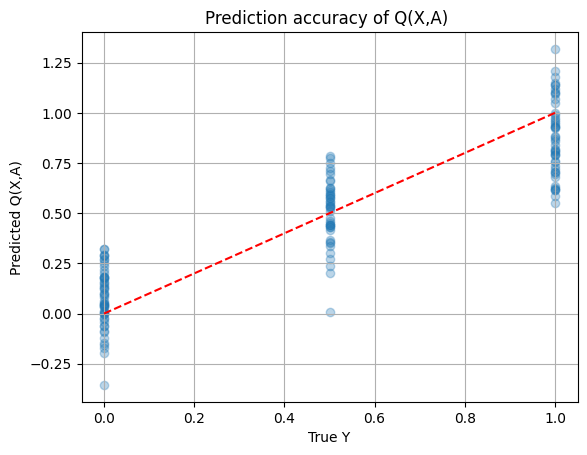

In [18]:
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel("True Y")
plt.ylabel("Predicted Q(X,A)")
plt.title("Prediction accuracy of Q(X,A) ")
plt.grid()
plt.show()


In [19]:
#モデルの保存
import os
import joblib
# モデル保存ディレクトリの作成（存在しない場合のみ）
os.makedirs("/content/drive/MyDrive/卒論/results/models", exist_ok=True)
joblib.dump(mlp, "/content/drive/MyDrive/卒論/results/models/mlp_q_model.pkl")

print("モデルを results/models/mlp_q_model.pkl に保存しました。")

モデルを results/models/mlp_q_model.pkl に保存しました。
